In [1]:
import numpy as np, local, plottools as pl, basic, delens_func, curvedsky as cs, tools_cmb, tools_lens, tools_delens, tools_multitracer, binning, tqdm
from matplotlib.pyplot import *

In [2]:
snmin, snmax = 1, 100
olmax = 1024

In [3]:
kwargs_cmb  = {\
    't':'id', \
    'fltr':'none', \
}
kwargs_qrec = {\
    'qlist':['EB'], \
    'rlmin':200, \
    'rlmax':1024, \
    'olmax':1024, \
    'nside':512, \
}
kwargs_mass = {\
    'add_cmb':[], \
    #'add_cmb':['EB'], \
    'add_gal':np.arange(3), \
    #'add_cib':True, \
    #'add_gal':[], \
    'add_cib':False, \
    'lmax':2048, \
}
kwargs_del = {\
    'elmin':10, \
    'elmax':1024, \
    'klmin':10, \
    'kfltr':'none', \
    'olmax':1024, \
}

In [13]:
glob = local.analysis(snmin=snmin,snmax=snmax)
cobj = tools_cmb.cmb_anisotropies(t='id')
Eobj = tools_cmb.cmb_anisotropies(t='id')
qobj = tools_lens.interface(kwargs_cmb=kwargs_cmb,kwargs_qrec=kwargs_qrec)
mobj = tools_multitracer.mass_tracer(qobj,**kwargs_mass)
Mobj = tools_multitracer.mass_tracer(qobj)
dobj = tools_delens.lensing_template(Eobj,mobj,**kwargs_del)

loading TT/EE/BB/TE from pre-computed spectrum: ../data/lensing/cmb/aps//mcl_idcom_white_fullsky_a0.0deg_o.dat


In [5]:
r, mBB, mBT, mTT = 0., 0., 0., 0.
for i in tqdm.tqdm(range(snmin,snmax+1)):
    BB, TT, BT = np.loadtxt(dobj.cl[i],unpack=True)
    r += BT**2/BB/TT/(snmax-snmin+1)
    mBB += BB/(snmax-snmin+1)
    mBT += BT/(snmax-snmin+1)
    mTT += TT/(snmax-snmin+1)

  0%|          | 0/100 [00:00<?, ?it/s]/global/homes/t/toshiyan/.conda/envs/loc/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.
100%|██████████| 100/100 [00:00<00:00, 110.80it/s]


In [6]:
rb = {}
mb = binning.multipole_binning(40,lmin=5,lmax=200)
rb = binning.binning(r,mb)

In [24]:
Mobj.get_spectra_matrix()
vec = Mobj.signal_covariance[0,1:4,:]
cov = Mobj.clnl_matrix[1:4,1:4,:]
kk  = Mobj.signal_covariance[0,0,:]

In [25]:
tbb = delens_func.resbb_multitracer(dobj.olmax,dobj.elmin,dobj.elmax,dobj.klmin,dobj.klmax,vec,cov,kk,\
                                       glob.lEE[:dobj.elmax+1],glob.pp[:dobj.klmax+1],dobj.filter_E)

In [26]:
lmax = 2048
lbb = basic.delens.lensingbb(dobj.olmax,1,lmax,glob.lEE[:lmax+1],glob.pp[:lmax+1])

/global/homes/t/toshiyan/.conda/envs/loc/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  
/global/homes/t/toshiyan/.conda/envs/loc/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  
No handles with labels found to put in legend.


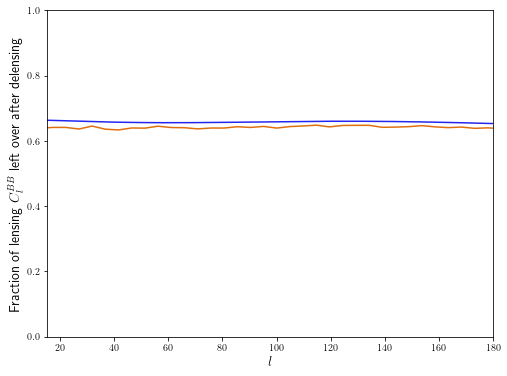

In [27]:
pl.plot_1dstyle(usetex=True,fsize=[8,6],xmin=15,xmax=180,ymin=.0,ymax=1.,xlab=r'$l$',ylab=r'Fraction of lensing $C^{BB}_l$ left over after delensing')
plot(1-tbb/lbb)
plot(mb.bc,1-rb)
legend(loc=0)

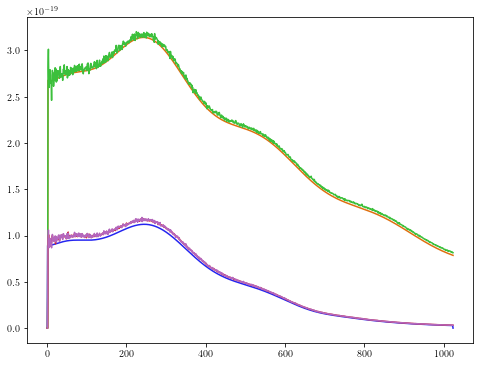

In [29]:
plot(tbb)
plot(lbb)
plot(mBB)
plot(mTT)
plot(mBT)